In [1]:
from pls_es import *
from outil_pl_opt import *

table_dif = []
table_temp = []
table_ques = []
table_w = []
for nb_obj in [3,4,5]:
    test_3_20_dif = []
    test_3_20_temp = []
    test_3_20_ques = []
    test_3_20_w = []

    for i in range(20):
        print(i,'*****************************************************************************')
        nb_objectif = nb_obj
        file = "2KP200-TA-0.dat"
        w = np.random.random(nb_objectif)
        w = w / w.sum()
        test_3_20_w.append(w)
        nb_objet = 20
        dif = []
        temp = []
        ques = []
        # model = "ponderee"
        infos = read_file(file, nb_objectif,nb_objet)

        res_gurobi_1, _ = PL_SP(infos, w)
    #     print("*****\nResultat de Gurobi p:",res_gurobi_1)
        # print(w)
        res_gurobi_2, _ = PL_SP(infos, w)
    #     print("*****\nResultat de Gurobi o:",res_gurobi_2)
        # print(w)

        model = "ponderee"
        t_start = time.time()
        pareto_index = PLS(file, nb_objectif=nb_objectif, nb_objet=nb_objet)
    #     print("*****\nPLS a trouve",len(pareto_index), " solutions")
        # print(pareto_index[0])
        values = [get_y(infos,s) for s in pareto_index]
        _,res,nb_q,_,hist = Procedure_PoseQues(np.array(values), w,model)
    #     print("*****\nProcedure1 avec somme ponderee:\nValue:",sum(res*w),"en ",time.time() - t_start,"secondes,pose",nb_q,"questions")
        dif.append(abs(res_gurobi_1 - sum(res*w))/res_gurobi_1)
        temp.append(time.time() - t_start)
        ques.append(nb_q)
        model = "OWA"
        values = [get_y(infos, s) for s in pareto_index]
        res,_, nb_q, _, hist = Procedure_PoseQues(np.array(values), w, model)
        res_v = values[res]
        res_v.sort(reverse=True)
        # print(res_v)
    #     print("*****\nProcedure1 avec OWA:\nValue:", sum(res_v * w), "en ", time.time() - t_start, "secondes,pose",
    #           nb_q, "questions")
        dif2 = abs(res_gurobi_2 - sum(res_v * w))/res_gurobi_2
        dif.append(dif2)
        temp.append(time.time() - t_start)
        ques.append(nb_q)
        model = "ponderee"
        Xe, nb_q, hist_solu, nb_voisinage, t = Procedure_Mix(w, model, file, nb_objectif, nb_objet)
    #     print("*****\nProcedure2 avec somme ponderee:\nValue:",get_v_total(infos,Xe,w,model), "en", t, "secondes,pose",
    #           nb_q, "questions")
        dif3 = abs(res_gurobi_1 - get_v_total(infos,Xe,w,model))/res_gurobi_1
        dif.append(dif3)
        temp.append(t)
        ques.append(nb_q)
        model = "OWA"
        Xe, nb_q, hist_solu, nb_voisinage, t = Procedure_Mix(w, model, file, nb_objectif, nb_objet)
    #     print("*****\nProcedure2 avec OWA:\nValue:", get_v_total(infos,Xe,w,model), "en", t,"secondes,pose",
    #           nb_q, "questions")
        dif4 = abs(res_gurobi_2 - get_v_total(infos,Xe,w,model))/res_gurobi_2
        dif.append(dif4)
        temp.append(t)
        ques.append(nb_q)
        test_3_20_dif.append(dif)
        test_3_20_temp.append(temp)
        test_3_20_ques.append(ques)
    table_dif.append(test_3_20_dif)
    table_temp.append(test_3_20_temp)
    table_ques.append(test_3_20_ques)
    table_w.append(test_3_20_w)

0 *****************************************************************************
Set parameter Username
Academic license - for non-commercial use only - expires 2022-03-22
1 *****************************************************************************
2 *****************************************************************************
3 *****************************************************************************
4 *****************************************************************************
5 *****************************************************************************
6 *****************************************************************************
7 *****************************************************************************
8 *****************************************************************************
9 *****************************************************************************
10 *****************************************************************************
11 *************************

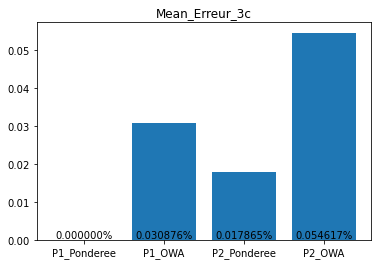

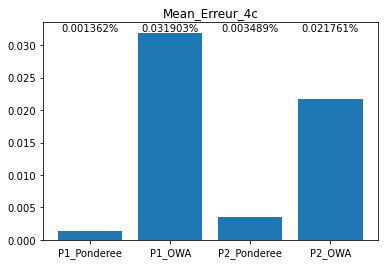

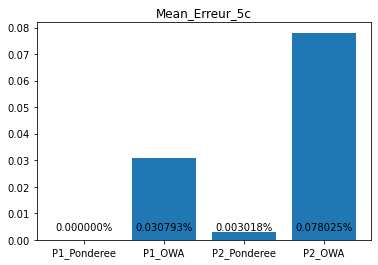

In [10]:
import matplotlib.pyplot as plt
name_list = ['P1_Ponderee','P1_OWA','P2_Ponderee','P2_OWA']
num_list_dif = []
for nb in range(3):
    num_list=[]
    for j in range(4):
        num_list.append(np.mean([table_dif[nb][i][j] for i in range(20)]))
    num_list_dif.append(num_list)
    plt.bar(range(len(num_list)), num_list,tick_label=name_list)
    for i in range(len(name_list)):
        plt.text(i, num_list[nb], '%f' % num_list[i]+ '%', ha='center', va= 'bottom',fontsize=10)
    plt.title("Mean_Erreur_"+(nb+3).__str__()+"c")
    plt.savefig("moyen_V_"+(nb+3).__str__()+".png")
    plt.show()

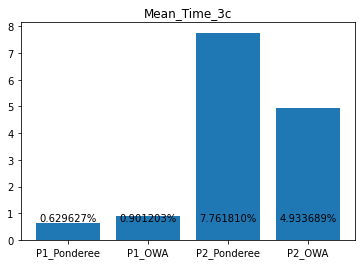

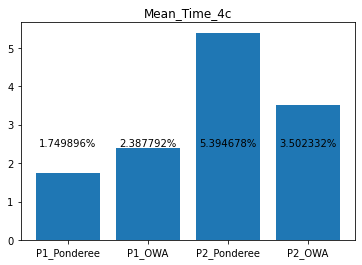

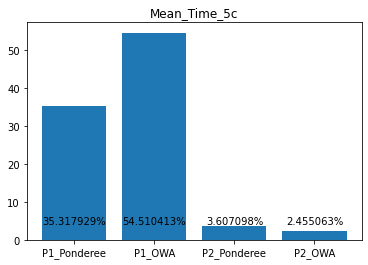

In [14]:
num_list_dif = []
for nb in range(3):
    num_list=[]
    for j in range(4):
        num_list.append(np.mean([table_temp[nb][i][j] for i in range(20)]))
    num_list_dif.append(num_list)
    plt.bar(range(len(num_list)), num_list,tick_label=name_list)
    for i in range(len(name_list)):
        plt.text(i, num_list[nb], '%f' % num_list[i]+ '%', ha='center', va= 'bottom',fontsize=10)
    plt.title("Mean_Time_"+(nb+3).__str__()+"c")
    plt.savefig("Moyenne_Temp_"+(nb+3).__str__()+".png")
    plt.show()

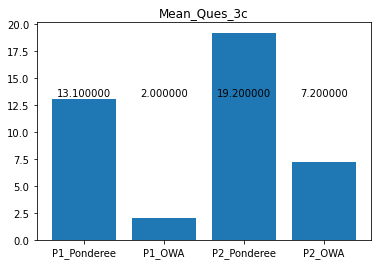

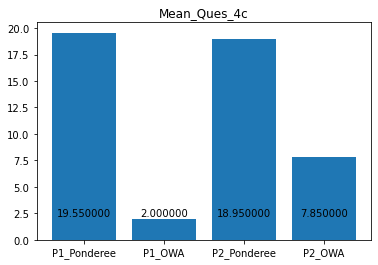

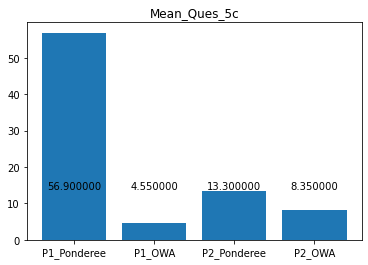

In [12]:
num_list_dif = []
for nb in range(3):
    num_list=[]
    for j in range(4):
        num_list.append(np.mean([table_ques[nb][i][j] for i in range(20)]))
    num_list_dif.append(num_list)
    plt.bar(range(len(num_list)), num_list,tick_label=name_list)
    for i in range(len(name_list)):
        plt.text(i, num_list[nb], '%f' % num_list[i], ha='center', va= 'bottom',fontsize=10)
    plt.title("Mean_Ques_"+(nb+3).__str__()+"c")
    plt.savefig("moyen_Q_"+(nb+3).__str__()+".png")
    plt.show()